This is an example query for finding podcasts according to a search term

In [79]:
from functools import reduce

ITUNES_URL = 'https://itunes.apple.com/search?'

#generate a search query
def getQuery(term,limit=200,entity='podcast',lang='en_us',url=ITUNES_URL,**kwargs):

    #setup search string
    query_parameters = [('term',str(term)),
            ('limit',str(limit)),
            ('entity',str(entity)),
            ('lang',str(lang))]
    
    if kwargs is not None:
        for key, value in kwargs.items():
            query_parameters.append((key,str(value)))
            
    #type handling
    
    search_query = reduce(lambda x,y: x+'&'+y,map(lambda x: x[0]+'='+x[1],query_parameters)).replace(' ','+')
    
    return url+search_query



In [80]:
#Generate a query
import requests
import time

query = getQuery(term='last turn')
data = requests.get(query).json()
print(url)
print(data['results'][0]['feedUrl'])

https://itunes.apple.com/search?term=last+turn&limit=200&entity=podcast&lang=en_us
http://feeds.soundcloud.com/users/soundcloud:users:168275829/sounds.rss


In [81]:
#select random podcasts

floc = '/home/bmassi/Dropbox/professional/Insight/'
fname = 'podcastone_database'

podcasts = pd.read_csv(floc+fname,sep='\n',header=None)
inds = list(range(0,10))

#print podcast name
for p in podcasts.iloc[inds].get_values():
    print(p)

['11.22.63 After Show']
['13 Reasons Why After Show']
['1x1 with Kristian Harloff']
['30 for 30 After Show']
['90 Day Fiance After Show']
['A Plate to Call Home']
['A Series Of Unfortunate Events After Show']
['Ace On The House']
['Action Movie Anatomy']
['Adam Carolla Live']


In [108]:
#Execute itunes search on podcasts, get data.
#Searches only ever x seconds
inter_query_interval = 3.1

feeds = []
search_times = []#timestamp, search speed
fails = []
i = 0;
total_len = len(podcasts)
for p in podcasts.get_values():
    
    print('iteration #'+str(i)+' of '+str(total_len))
    iter_start_time = time.time()
    
    #generate query
    query = getQuery(term=p)
    
    #make query
    #error handling for rate limiting 403 error
    flag = 1
    while(flag):
        try:
            search_start_time = time.time()
            request_out = requests.get(query)
            search_end_time = time.time()
            data = request_out.json()
            flag = 0
        except JSONDecodeError:
            print(request_out)

    #attempts to pull out feed URL
    try:
        feeds.append(data['results'][0]['feedUrl'])
    except:
        print('!!!!!!!!!!!Failure on '+p)
        fails.append(p)
    search_times.append((search_start_time,search_end_time-search_start_time))
    
    #implement timeout before next query.
    iter_end_time = time.time()
    duration = iter_end_time - iter_start_time
    time.sleep(max(0,inter_query_interval-(duration)))
    
    i += 1

iteration #0 of 730
iteration #1 of 730
iteration #2 of 730
iteration #3 of 730
['!!!!!!!!!!!Failure on 30 for 30 After Show']
iteration #4 of 730
iteration #5 of 730
iteration #6 of 730
iteration #7 of 730
iteration #8 of 730
iteration #9 of 730
iteration #10 of 730
iteration #11 of 730
["!!!!!!!!!!!Failure on Adam Carolla's Exclusive Interviews"]
iteration #12 of 730
iteration #13 of 730
iteration #14 of 730
iteration #15 of 730
['!!!!!!!!!!!Failure on After the Awards with Lori & Julia']
iteration #16 of 730
iteration #17 of 730
iteration #18 of 730
iteration #19 of 730
iteration #20 of 730
iteration #21 of 730
iteration #22 of 730
iteration #23 of 730
iteration #24 of 730
iteration #25 of 730
iteration #26 of 730
iteration #27 of 730
iteration #28 of 730
iteration #29 of 730
iteration #30 of 730
iteration #31 of 730
iteration #32 of 730
iteration #33 of 730
iteration #34 of 730
iteration #35 of 730
iteration #36 of 730
iteration #37 of 730
iteration #38 of 730
iteration #39 of 730


iteration #321 of 730
iteration #322 of 730
iteration #323 of 730
iteration #324 of 730
iteration #325 of 730
iteration #326 of 730
iteration #327 of 730
iteration #328 of 730
['!!!!!!!!!!!Failure on Madam Secretary AfterBuzz TV AfterShow']
iteration #329 of 730
iteration #330 of 730
iteration #331 of 730
iteration #332 of 730
iteration #333 of 730
iteration #334 of 730
iteration #335 of 730
iteration #336 of 730
iteration #337 of 730
iteration #338 of 730
iteration #339 of 730
iteration #340 of 730
iteration #341 of 730
iteration #342 of 730
iteration #343 of 730
iteration #344 of 730
iteration #345 of 730
['!!!!!!!!!!!Failure on Millennial Hollywood with Dakota T. Jones']
iteration #346 of 730
iteration #347 of 730
iteration #348 of 730
['!!!!!!!!!!!Failure on Minnesota Home Talk with Jason Walgrave']
iteration #349 of 730
iteration #350 of 730
iteration #351 of 730
iteration #352 of 730
iteration #353 of 730
iteration #354 of 730
iteration #355 of 730
iteration #356 of 730
iteration

iteration #633 of 730
iteration #634 of 730
iteration #635 of 730
iteration #636 of 730
iteration #637 of 730
iteration #638 of 730
iteration #639 of 730
['!!!!!!!!!!!Failure on The Soccer Observers']
iteration #640 of 730
iteration #641 of 730
iteration #642 of 730
iteration #643 of 730
iteration #644 of 730
iteration #645 of 730
iteration #646 of 730
['!!!!!!!!!!!Failure on The Strain AfterBuzz TV AfterShow']
iteration #647 of 730
iteration #648 of 730
iteration #649 of 730
iteration #650 of 730
iteration #651 of 730
iteration #652 of 730
iteration #653 of 730
['!!!!!!!!!!!Failure on The Tyler Johnstone Podcast']
iteration #654 of 730
iteration #655 of 730
iteration #656 of 730
iteration #657 of 730
iteration #658 of 730
iteration #659 of 730
iteration #660 of 730
iteration #661 of 730
iteration #662 of 730
iteration #663 of 730
iteration #664 of 730
iteration #665 of 730
iteration #666 of 730
iteration #667 of 730
iteration #668 of 730
iteration #669 of 730
iteration #670 of 730
ite

In [109]:
#save grabbed feeds

curtime = round(time.time())
fname = 'podone_feed_list' + str(curtime)

with open(fname,'a') as fid:
    for feed in feeds:
        fid.write(feed+'\n')

In [102]:
#This will generate a 403 error.
inter_query_interval = 3.1

i = 0;
total_len = len(podcasts)
for j in range(0,30):
    iter_start_time = time.time()
    
    query = getQuery(term=podcasts.iloc[i+400].get_values())
    data = requests.get(query).json()


In [32]:
#pull data from RSS feed

import feedparser as fp
import pandas as pd
import html

#from https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

fname = 'podone_feed_list1528321098'
floc = '/home/bmassi/Dropbox/professional/Insight/data/'

feeds = pd.read_csv(floc+fname,sep='\n',header=None)

url = feeds.iloc[0].item()
#url = 'http://feeds.soundcloud.com/users/soundcloud:users:168275829/sounds.rss';
parsed_feed = fp.parse(url)

#go to 'entries' key, which is a list of entries.
#    published: date of publish
#    summary: summary of *****THIS IS THE IMPORTANT ONE*****
print(url)
print(parsed_feed['feed']['subtitle'])
print(len(parsed_feed['entries']))
print(remove_html_tags(html.unescape(parsed_feed['entries'][0]['summary'])))


http://www.afterbuzztv.com/aftershows/11-22-63-afterbuzz-tv-aftershow/feed/
The Worldwide Leader in TV Discussion
8
AFTERBUZZ TV — 11.22.63 edition, is a weekly “after show” for fans of 11.22.63. In this episode host Frank Moran, Marielou Mandl and Michael Clouse breaks down episode 8. 11.22.63 is an American thriller limited series based on the book 11/22/63 by Stephen King, and will consist of eight episodes. The series is executive produced by J.J. Abrams, […]
The post 11.22.63 S:1 | The Day In Question E:8 | AfterBuzz TV AfterShow appeared first on AfterBuzz TV Network.


In [ ]:
#pull data from collection of RSS feeds
import feedparser as fp
import pandas as pd
import pickle
import time
import socket

fname = 'podone_feed_list1528321098'
floc = '/home/bmassi/Dropbox/professional/Insight/data/'

feeds = pd.read_csv(floc+fname,sep='\n',header=None)


MAX_REQUEST_DURATION = 10 #seconds
socket.setdefaulttimeout(MAX_REQUEST_DURATION)

summary_data = []
error_feeds = []
start_time = time.time()
reqtimes = []
for i in range(0,len(feeds)):
    print("Reading " + str(i) + " out of " + str(len(feeds)))
    url = feeds.iloc[i].item()
    try:
        parsed_feed = 0
        parsed_feed = fp.parse(url)
        title = parsed_feed['feed']['title']
        summaries = [e['summary'] for e in parsed_feed['entries']]
        summary_data.append((title,summaries))
    except:
        print('Error reading '+url)
        error_feeds.append(url)
stop_time = time.time()
socket.setdefaulttimeout(None)

print('Duration: ' + str(stop_time-start_time) + ' (' + str((stop_time-start_time)/len(feeds)) + ' per feed)')

Reading 0 out of 677
Reading 1 out of 677
Reading 2 out of 677
Reading 3 out of 677
Error reading https://feeds.podcastmirror.com/90-day-fiance
Reading 4 out of 677
Error reading http://www.podcastone.com.au/podcast?categoryID2=8003
Reading 5 out of 677
Reading 6 out of 677
Error reading http://feeds.feedburner.com/AceOnTheHouse
Reading 7 out of 677
Error reading http://popcorntalknetwork.com/ptn-episodes/action-movie-anatomy/feed/
Reading 8 out of 677
Error reading http://millionaire-interviews.libsyn.com/rss
Reading 9 out of 677
Reading 10 out of 677


In [5]:
#Save feed file
import time

floc = '/home/bmassi/Dropbox/professional/Insight/data/'

with open(floc+'summaries'+str(round(time.time()))+'.pkl','wb') as fid:
    pickle.dump(summary_data,fid)

In [1]:
#Load feed file
import pickle
import pandas as pd

floc = '/home/bmassi/Dropbox/professional/Insight/data/'
fname = 'summaries1528403075.pkl'

summary_data = pickle.load(open(floc+fname,'rb'))

In [41]:
#preprocess text in summaries

import feedparser as fp
import pandas as pd
import html
from nltk.tokenize import TreebankWordTokenizer
import string
from nltk.corpus import stopwords

#These functions clean the data in various ways
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)   

####################THIS NEEDS DEFINING
def replace_dash(text):
    return text.replace('-',' ')

#This removes non-alphabetical characters and makes everything lower case
def clean(text):
    return ''.join(c for c in remove_html_tags(replace_dash(html.unescape(text.lower()))) if c in string.ascii_lowercase+' ')
#this tokenizes intelligently
def tokenize(text):
    return TreebankWordTokenizer().tokenize(text)
#this removes stopword tokens from a list of tokens
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stopwords.words('english')]

#this will clean & tokenize a list of documents.
def preprocess_documents(summaries):
    return [remove_stop_words(tokenize(clean(s))) for s in summaries]

#execute preprocessing
# preprocessed_summaries = [(s[0],preprocess_documents(s[1])) for s in summary_data]
preprocessed_summaries = []
i = 1
for s in summary_data:
    print("Preprocessing " + str(i) + " out of " + str(len(summary_data)))
    preprocessed_summaries.append((s[0],preprocess_documents(s[1])))
    i += 1

Preprocessing 1 out of 660
Preprocessing 2 out of 660
Preprocessing 3 out of 660
Preprocessing 4 out of 660
Preprocessing 5 out of 660
Preprocessing 6 out of 660
Preprocessing 7 out of 660
Preprocessing 8 out of 660
Preprocessing 9 out of 660
Preprocessing 10 out of 660
Preprocessing 11 out of 660
Preprocessing 12 out of 660
Preprocessing 13 out of 660
Preprocessing 14 out of 660
Preprocessing 15 out of 660
Preprocessing 16 out of 660
Preprocessing 17 out of 660
Preprocessing 18 out of 660
Preprocessing 19 out of 660
Preprocessing 20 out of 660
Preprocessing 21 out of 660
Preprocessing 22 out of 660
Preprocessing 23 out of 660
Preprocessing 24 out of 660
Preprocessing 25 out of 660
Preprocessing 26 out of 660
Preprocessing 27 out of 660
Preprocessing 28 out of 660
Preprocessing 29 out of 660
Preprocessing 30 out of 660
Preprocessing 31 out of 660
Preprocessing 32 out of 660
Preprocessing 33 out of 660
Preprocessing 34 out of 660
Preprocessing 35 out of 660
Preprocessing 36 out of 660
P

Preprocessing 290 out of 660
Preprocessing 291 out of 660
Preprocessing 292 out of 660
Preprocessing 293 out of 660
Preprocessing 294 out of 660
Preprocessing 295 out of 660
Preprocessing 296 out of 660
Preprocessing 297 out of 660
Preprocessing 298 out of 660
Preprocessing 299 out of 660
Preprocessing 300 out of 660
Preprocessing 301 out of 660
Preprocessing 302 out of 660
Preprocessing 303 out of 660
Preprocessing 304 out of 660
Preprocessing 305 out of 660
Preprocessing 306 out of 660
Preprocessing 307 out of 660
Preprocessing 308 out of 660
Preprocessing 309 out of 660
Preprocessing 310 out of 660
Preprocessing 311 out of 660
Preprocessing 312 out of 660
Preprocessing 313 out of 660
Preprocessing 314 out of 660
Preprocessing 315 out of 660
Preprocessing 316 out of 660
Preprocessing 317 out of 660
Preprocessing 318 out of 660
Preprocessing 319 out of 660
Preprocessing 320 out of 660
Preprocessing 321 out of 660
Preprocessing 322 out of 660
Preprocessing 323 out of 660
Preprocessing 

Preprocessing 573 out of 660
Preprocessing 574 out of 660
Preprocessing 575 out of 660
Preprocessing 576 out of 660
Preprocessing 577 out of 660
Preprocessing 578 out of 660
Preprocessing 579 out of 660
Preprocessing 580 out of 660
Preprocessing 581 out of 660
Preprocessing 582 out of 660
Preprocessing 583 out of 660
Preprocessing 584 out of 660
Preprocessing 585 out of 660
Preprocessing 586 out of 660
Preprocessing 587 out of 660
Preprocessing 588 out of 660
Preprocessing 589 out of 660
Preprocessing 590 out of 660
Preprocessing 591 out of 660
Preprocessing 592 out of 660
Preprocessing 593 out of 660
Preprocessing 594 out of 660
Preprocessing 595 out of 660
Preprocessing 596 out of 660
Preprocessing 597 out of 660
Preprocessing 598 out of 660
Preprocessing 599 out of 660
Preprocessing 600 out of 660
Preprocessing 601 out of 660
Preprocessing 602 out of 660
Preprocessing 603 out of 660
Preprocessing 604 out of 660
Preprocessing 605 out of 660
Preprocessing 606 out of 660
Preprocessing 

In [42]:
#Remove empty feeds
empty_inds = []
for i in range(0,len(preprocessed_summaries)):
    if(not preprocessed_summaries[i][1]):
        empty_inds = i
    
preprocessed_summaries.pop(empty_inds)

('Comments on:', [])

In [43]:
#make corpuses for gross-analyses
from functools import reduce

#extract titles
titles = [s[0] for s in preprocessed_summaries]

#Make individual feed corpuses
doc_corpus = [reduce(lambda x,y: x+y,s[1]) for s in preprocessed_summaries]
#Make one huge corpus and applie counter
corpus = reduce(lambda x,y: x+y, doc_corpus)

In [73]:
#count term frequency in corpuses
from collections import Counter
from matplotlib import pyplot as plt


counted = Counter(corpus)

#compute document frequency for each word
df = defaultdict(int)
for d in doc_corpus:
    s = set(d)
    for word in s:
        df[word] += 1
        
#compute global tf-idf
global_tfidf = {}
for word in set(corpus):
    global_tfidf[word] = (-np.log(df[word]/len(doc_corpus)))*counted[word]
    

sorted_global_tfidf = sorted([(key,global_tfidf[key]) for key in global_tfidf.keys()],key=lambda x: x[1],reverse=True)


Text(0,0.5,'Total count')

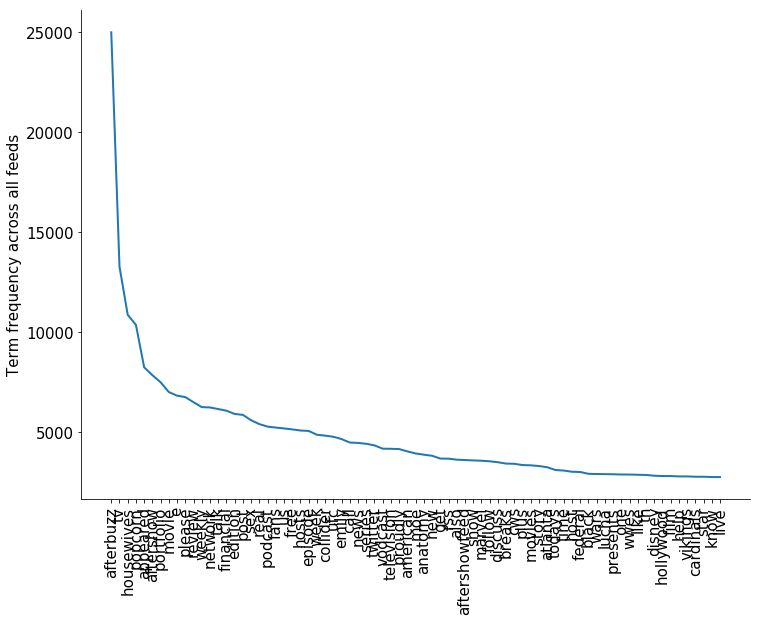

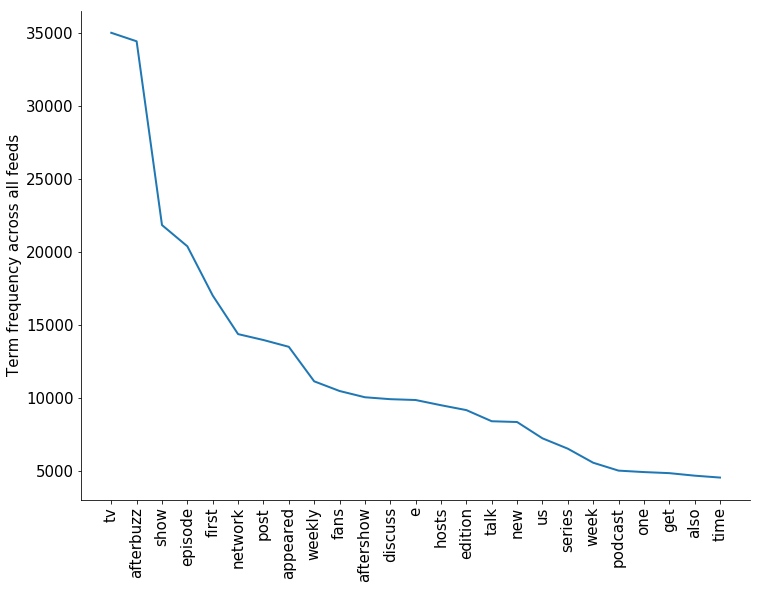

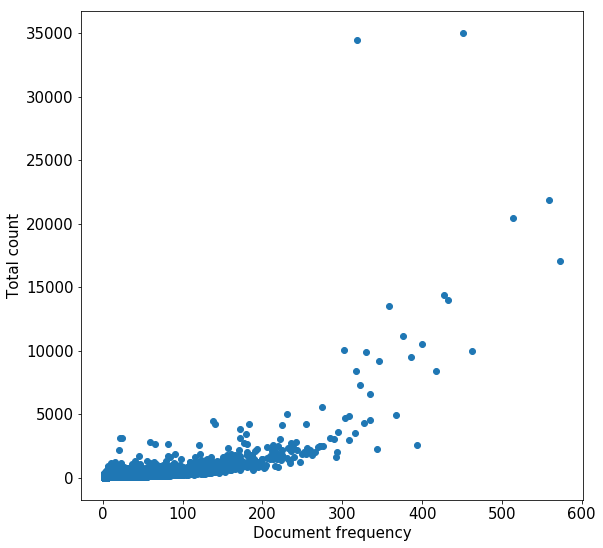

In [98]:
#identify putatively diagnostic words
#global TF-IDF: how often does a word occur in total divided by the log document-wise rate.
from collections import defaultdict
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

#document-wide tf-idf
fig,ax = plt.subplots(1,1,figsize=[12,9])
plt.plot([c[0] for c in sorted_global_tfidf[0:75]],[c[1] for c in sorted_global_tfidf[0:75]],linewidth=2)
plt.xticks(rotation=90);
plt.ylabel('Term frequency across all feeds');
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


fig,ax = plt.subplots(1,1,figsize=[12,9])
ax.plot([c[0] for c in counted.most_common()[0:25]],[c[1] for c in counted.most_common()[0:25]],
         linewidth=2)
ax.set_ylabel('Term frequency across all feeds');
# Hide the right and top spines
plt.xticks(rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#Plot global term frequency vs. document frequency
#Scatterplot of global TF-IDF for top 75 terms
scatter_data = []
for word in set(corpus):
    scatter_data.append((df[word],counted[word]))
plt.figure(figsize=[9,9])
x,y = zip(*scatter_data)
plt.scatter(x,y)
plt.xlabel('Document frequency')
plt.ylabel('Total count')

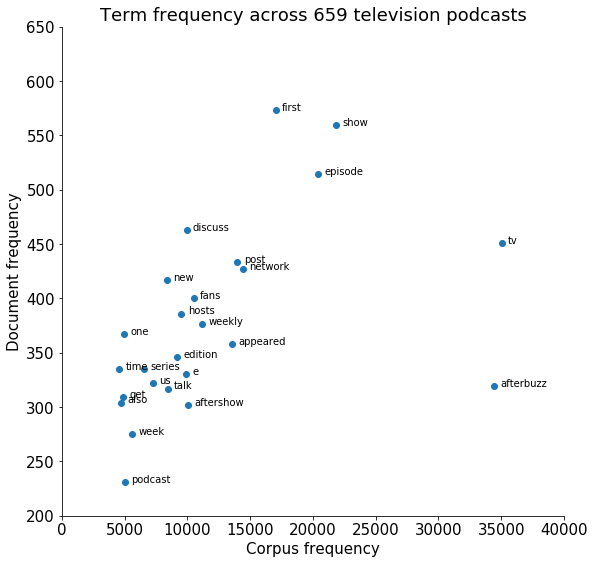

In [100]:
#Document frequency scatterplot
matplotlib.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[9,9])
ax.scatter([c[1] for c in counted.most_common()[0:25]],[df[c[0]] for c in counted.most_common()[0:25]])
matplotlib.rcParams.update({'font.size': 10})
for i in range(0,25):
    ax.text(counted.most_common()[i][1]+500,df[counted.most_common()[i][0]],
              counted.most_common()[i][0])
matplotlib.rcParams.update({'font.size': 15})
plt.xlabel('Corpus frequency')
plt.ylabel('Document frequency')
plt.ylim([200,650])
plt.xlim([0,40000])
plt.title('Term frequency across 659 television podcasts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [96]:
print(len(doc_corpus))
print(1/len(doc_corpus))
print(-np.log(300/len(doc_corpus)))
print(counted['tv'])
print(global_tfidf['tv'])
print(df['tv'])
print(df['aftershow'])
[c[0] for c in counted.most_common()[0:25]]

659
0.0015174506828528073
0.7869410598463061
35029
13284.965254649003
451
302


['tv',
 'afterbuzz',
 'show',
 'episode',
 'first',
 'network',
 'post',
 'appeared',
 'weekly',
 'fans',
 'aftershow',
 'discuss',
 'e',
 'hosts',
 'edition',
 'talk',
 'new',
 'us',
 'series',
 'week',
 'podcast',
 'one',
 'get',
 'also',
 'time']

Text(0,0.5,'Total count')

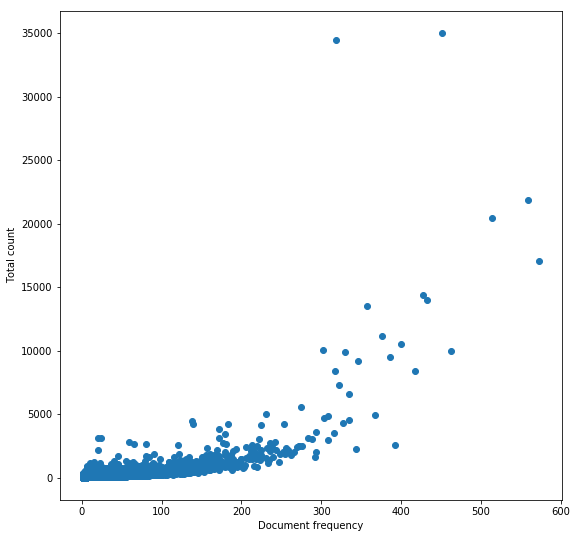

#### This pseudocode grabs podcasts and stores them in a database w/ their RSS feed

for podcast in podcast_name_database
	search podcast
	get podcast rss feed
	put feed in database w/ podcast name (and date accessed)
	

for feed in rss_database
    open feed
    generate list of episodes w/ title, description, and other metadata for each episode
    store in another table 
    
    
    
##Database structure
Two tables:

1: podcast centric, each row is a podcast
    -podcast id, podcast title, authors, rss feed, last updated, last accessed, other metadata
2: episode centric, each row is a podcast episode
    -episode id, podcast id, podcast title, episode title, episode description, other metadata